# 神经网络

参考：
https://www.leiphone.com/news/201806/mHFSo8zyLsX7L581.html
https://yq.aliyun.com/articles/647350


## 什么是神经网络

介绍神经网络的文章大多数都会将它和大脑进行类比。如果没有深入研究过大脑与神经网络，那么将神经网络解释为一种将给定输入映射为期望输出的数学关系会更容易理解。

人工神经网络（ANNs）是一种模拟人脑设计的软件。我们不需要去理解复杂的生物大脑结构，我们只需要知道大脑是由一些神经元经过组织形成的，而这种组织是有逻辑输入输出关系的。这些关系是根据其微电流或者化学信号来记性调控的。人脑中的神经网络时一个非常巨大互联的神经元网络，其中一个神经元的输出可能是多个神经元的输入。学习是通过不断的去激活一些神经元，从而加强了一些神经元的连接。这些加强的连接可以更加使得我们输出期望的结果。这种反馈学习方式，可以使得神经网络越来越高效率，越来越准确。

人工神经网络尝试去模仿并且简化这种大脑行为，使得这种大脑学习方式可以被用来进行监督学习或者非监督学习。在监督学习中，数据集会提供标准的输入数据和输出数据，使得神经网络可以根据输入数据输出期望的输出。举个例子，垃圾邮件识别。训练集中的数据输入的是一封邮件的内容，其中可能包括很多的单词，输出数据是一个分类结果，说明这封邮件是垃圾邮件还是正常邮件。当我们使用大量的这类邮件数据去训练我们的神经网络时，那么下次神经网络对新的邮件数据输入时，就可以自动判断该邮件是否是垃圾邮件了。

在非监督学习中，我们尝试让神经网络去自己学习数据的结构，从而去分析数据。


## 神经网络的结构

大体上，人工神经网络基本包含以下组件：
  - 接收数据并传递数据的输入层（input layer）
  - 任意数量的隐藏层（hidden layer）
  - 一个输出层（output layer）
  - 层与层之间的权重（weight）和偏置 (bias)
  - 每个隐藏层使用的激活函数为隐藏层选择一种激活函数 （activation function），用 $σ$ 表示，例如常用的 Sigmoid 激活函数

## 神经网络的分类

人工神经网络有几种不同类型的神经网络，比如前馈神经网络、卷积神经网络及递归神经网络等。


## 激活函数

最常用的激活函数就是 sigmoid 函数，如下：

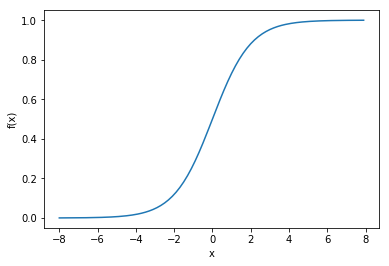

In [3]:
import matplotlib.pylab as plt
import numpy as np 
x = np.arange(-8, 8, 0.1)
y = 1 / (1 + np.exp(-x)) 
plt.plot(x, y) 
plt.xlabel('x') 
plt.ylabel('y(x)')
plt.show()

如上图所示，这个函数的功能就是 “激活” 作用，即当我们输入的 x 值大于某一个特定的值时，该函数的值就从 0 变成了 1 。sigmoid 函数不是一个分段函数，它是一个连续函数，也就是说输出结果是一个连续变化，不会发生突变。也就是说，这是一个可导函数，这个性质对于训练算法非常重要。
这里 `y = 1 / (1 + np.exp(-x))` 是指
$$ y = \frac{1}{1+e^{-x}}$$
再来看这个函数：
$$exp(x) = e^x$$

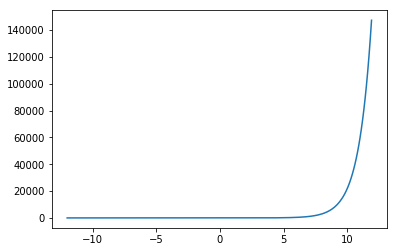

In [14]:
import matplotlib.pylab as plt
import numpy as np 
x = np.arange(-12, 12, 0.1)
y = np.exp(x)
plt.plot(x, y)
plt.show()

## 神经网络的结构
下面将以简单的前馈或感知神经网络为例，这种类型的人工神经网络是直接从前到后传递数据的，简称前向传播过程。

而训练前馈神经元通常需要反向传播算法，这就需要为网络提供相应的输入和输出集。当输入数据被传输到神经元时，它会经过相应的处理，并将产生的输出传输给下一层。

![神经网络的结构](..//fig//neural-net-structure.png)

### 节点

生物神经元是按照分层来连接的，也就是说一些神经元的输出结果是另一些神经元的输入数据。我们可以把这个生物神经网络表示成一些连接的节点。每个节点都有很多的输入节点，并且这些节点是经过加权输入的，然后将激活函数应用到这个节点上面，并且产生节点的输出结果。

下图是一个 2 层神经网络的结构（在计算网络层数时通常排除输入层）

![神经网络的节点](..//fig//neural-net.jpeg)

用 Python 可以很容易的构建神经网络类，例如

In [15]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(y.shape)

### 训练神经网络

这个网络的输出 ŷ 为：

$$ \hat{y} = \sigma(W_2\sigma(W_1x+b_1)+b_2) $$

在上面的等式中，输出 ŷ 是 W 和 b 函数。

因此 W 和 b 的值影响预测的准确率. 所以根据输入数据对 W 和 b 调优的过程就被成为训练神经网络。

每步训练迭代包含以下两个部分:

  - 计算预测结果 ŷ，这一步称为前向传播
  - 更新 W 和 b,，这一步成为反向传播

下面的顺序图展示了这个过程：

![神经网络的过程](..//fig//neural-net-flow.jpeg)

## 前向传播

前向传播只是简单的计算。对于一个基本的 2 层网络来说，它的输出是这样的：

$$ \hat{y} = \sigma(W_2\sigma(W_1x+b_1)+b_2) $$

我们在 NeuralNetwork 类中增加一个计算前向传播的函数。为了简单起见我们假设偏置 b 为0：


In [ ]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

## 损失函数

但是我们还需要一个方法来评估预测结果的好坏（即预测值和真实值的误差）。这就要用到损失函数。

常用的损失函数有很多种，根据模型的需求来选择。例如使用误差平方和作为损失函数。

$$ Loss(y,\, \hat y) = \sum_{i=1}^n{(y-\hat y)^2}$$

误差平方和是求每个预测值和真实值之间的误差再求和，这个误差是他们的差值求平方以便我们观察误差的绝对值。

训练的目标是找到一组 W 和 b，使得损失函数最好小，也即预测值和真实值之间的距离最小。

## 反向传播

我们已经度量出了预测的误差（损失），现在需要找到一种方法来传播误差，并以此更新权值和偏置。

为了知道如何适当的调整权值和偏置，我们需要知道损失函数对权值 W 和偏置 b 的导数。

回想微积分中的概念，函数的导数就是函数的斜率。

![梯度下降法](..//fig//loss-function.jpeg)

如果我们已经求出了导数，我们就可以通过增加或减少导数值来更新权值 W 和偏置 b（参考上图）。这种方式被称为梯度下降法。

但是我们不能直接计算损失函数对权值和偏置的导数，因为在损失函数的等式中并没有显式的包含他们。因此，我们需要运用链式求导发在来帮助计算导数。

$$
\begin{array}
\frac{\partial(y,\, \hat y)}{\partial W}
&=& \frac{\partial(y,\, \hat y)}{\partial \hat y} \times \frac{\partial \hat y}{\partial Z} \times \frac{\partial z}{\partial W} \\
&=& 2(y-\hat y) \times \sigma^\prime \times x \\
&=& 2(y - \hat y) \times z(1-z) \times x 
\end{array}
$$

链式法则用于计算损失函数对 W 和 b 的导数。注意，为了简单起见。我们只展示了假设网络只有 1 层的偏导数。

这虽然很简陋，但是我们依然能得到想要的结果—损失函数对权值 W 的导数（斜率），因此我们可以相应的调整权值。

现在我们将反向传播算法的函数添加到 Python 代码中


## 一个例子

## 数据

![数据](..//fig//neural-net-data.png)

将神经网络进行 1500 次迭代。

### 完整的神经网络代码

In [ ]:
import numpy as np

class NeuralNetwork():
    
    def __init__(self):
        # 设置随机数种子
        np.random.seed(1)        
        # 将权重转化为一个3x1的矩阵，其值分布为-1~1，并且均值为0
        self.synaptic_weights = 2 * np.random.random((3, 1)) - 1

    def sigmoid(self, x):
        # 应用sigmoid激活函数
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        #计算Sigmoid函数的偏导数
        return x * (1 - x)
    
    def train(self, training_inputs, training_outputs, training_iterations):
            # 训练模型
        for iteration in range(training_iterations):
            # 得到输出
            output = self.think(training_inputs)
            # 计算误差
            error = training_outputs - output            
            # 微调权重
            adjustments = np.dot(training_inputs.T, error * self.sigmoid_derivative(output))
            self.synaptic_weights += adjustments

    def think(self, inputs):
        # 输入通过网络得到输出   
        # 转化为浮点型数据类型        
        inputs = inputs.astype(float)
        output = self.sigmoid(np.dot(inputs, self.synaptic_weights))
        return output

if __name__ == "__main__":
    # 初始化神经类
    neural_network = NeuralNetwork()
    print("Beginning Randomly Generated Weights: ")
    print(neural_network.synaptic_weights)
    #训练数据
    training_inputs = np.array([[0,0,1],
                                [1,1,1],
                                [1,0,1],
                                [0,1,1]])
    training_outputs = np.array([[0,1,1,0]]).T

    # 开始训练
    neural_network.train(training_inputs, training_outputs, 15000)
    print("Ending Weights After Training: ")
    print(neural_network.synaptic_weights)
    user_input_one = str(input("User Input One: "))
    user_input_two = str(input("User Input Two: "))
    user_input_three = str(input("User Input Three: "))
    
    print("Considering New Situation: ", user_input_one, user_input_two, user_input_three)
    print("New Output data: ")
    print(neural_network.think(np.array([user_input_one, user_input_two, user_input_three])))
    print("Wow, we did it!")